In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("saplabs.csv") 

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,23756,B0013NUGDE,A2OH0EA9PEW4FN,bookgoddess88,2,3,1279411200,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,3
1,528127,B000JMDH40,A8GHHQVULZ9NF,Alessandra,1,1,1240012800,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,5
2,491505,B0026LJRW8,A2S40W6PSX0CQI,Benjamin,1,1,1336348800,Baconlicious!,it's difficult to come up with 20 words for su...,5
3,98982,B001ED0H3C,A1XM4P40K1OPOM,"James M. Martin ""Mike""",0,0,1336694400,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...,5
4,435471,B000HDI5O8,AGCA8UHBJZ1JI,Nancy J. Jacobsen,1,1,1272067200,organic pumpkin,"ALthough the pumkin was good, almost 90% of th...",3


In [4]:
data.shape

(397917, 10)

In [5]:
data.isnull().values.ravel().sum()

35

In [6]:
data.dropna(subset=None, inplace=True)

In [7]:
data.shape

(397882, 10)

In [79]:
X = data.drop(['Score'], axis = 1) 
Y = data["Score"] 

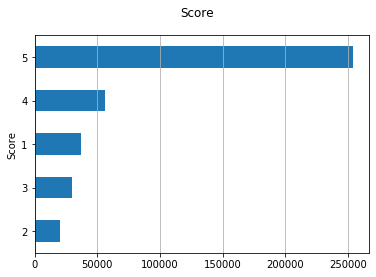

In [9]:
fig, ax = plt.subplots()
fig.suptitle("Score", fontsize=12)
Y.reset_index().groupby("Score").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [80]:
X.shape

(397882, 9)

In [11]:
X

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
0,23756,B0013NUGDE,A2OH0EA9PEW4FN,bookgoddess88,2,3,1279411200,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...
1,528127,B000JMDH40,A8GHHQVULZ9NF,Alessandra,1,1,1240012800,Delicious!!!,Baby love it!Taste sweet but there is no sugar...
2,491505,B0026LJRW8,A2S40W6PSX0CQI,Benjamin,1,1,1336348800,Baconlicious!,it's difficult to come up with 20 words for su...
3,98982,B001ED0H3C,A1XM4P40K1OPOM,"James M. Martin ""Mike""",0,0,1336694400,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...
4,435471,B000HDI5O8,AGCA8UHBJZ1JI,Nancy J. Jacobsen,1,1,1272067200,organic pumpkin,"ALthough the pumkin was good, almost 90% of th..."
...,...,...,...,...,...,...,...,...,...
397912,249803,B000E5U37G,A30R1CQB41YKLB,"Charles Allard ""cdallard""",0,0,1232841600,If you don't have time to start from scratch...,"It's always better to start from scratch, and ..."
397913,102567,B0039BBWN6,A1UIXA657W8LWT,J. Williams,2,3,1312588800,does what it's supposed to do,"OK I can say I've used Infinit, Accelerade, Ga..."
397914,527792,B001EO7DTC,A17SW9EAXUD4C3,Frank Conforte,4,4,1286496000,Way Overpriced,First I bought this because it was suppose to ...
397915,146845,B000LKTSO8,A3NU6TD1AW8P8F,Little Mother,6,26,1282176000,Choking Hazard and then some,"These teething biscuits are great, if you HOVE..."


In [12]:
Y

0         3
1         5
2         5
3         5
4         3
         ..
397912    5
397913    5
397914    1
397915    1
397916    4
Name: Score, Length: 397882, dtype: int64

In [81]:
# Pre-processing

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    clean_text = text.strip()
    clean_text = clean_text.lower()
    clean_text = re.sub(r'\d+','',clean_text)
    lookup_table = clean_text.maketrans('', '', string.punctuation)
    clean_text = clean_text.translate(lookup_table)
    word_list = word_tokenize(clean_text)
    word_list = [w for w in word_list if not w in stop_words]
    word_list = [lemmatizer.lemmatize(word) for word in word_list]
    clean_text = ' '.join(word_list)

    return clean_text

In [82]:
X["TextClean"] = X["Text"].apply(lambda x: preprocess(x))

In [83]:
X["SummaryClean"] = X["Summary"].apply(lambda x: preprocess(x))

In [84]:
X.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,TextClean,SummaryClean
0,23756,B0013NUGDE,A2OH0EA9PEW4FN,bookgoddess88,2,3,1279411200,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,order chip regular basis like portioned one ba...,point weight watcher
1,528127,B000JMDH40,A8GHHQVULZ9NF,Alessandra,1,1,1240012800,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,baby love ittaste sweet sugar baby love lookin...,delicious
2,491505,B0026LJRW8,A2S40W6PSX0CQI,Benjamin,1,1,1336348800,Baconlicious!,it's difficult to come up with 20 words for su...,difficult come word sunflower seed awesome wor...,baconlicious
3,98982,B001ED0H3C,A1XM4P40K1OPOM,"James M. Martin ""Mike""",0,0,1336694400,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...,beleive probe oregon scientific burned anyone ...,probe work oregon scientific
4,435471,B000HDI5O8,AGCA8UHBJZ1JI,Nancy J. Jacobsen,1,1,1272067200,organic pumpkin,"ALthough the pumkin was good, almost 90% of th...",although pumkin good almost can dented badly w...,organic pumpkin


# Only Text 

In [17]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(X['TextClean'], Y, test_size = 0.3, random_state = 42)

## TFIDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

xTrainTfidf = tfidf_vect.fit_transform(xTrain)
xTestTfidf = tfidf_vect.transform(xTest)

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 

In [20]:
svc_text_tfidf = LinearSVC()

svc_text_tfidf.fit(xTrainTfidf,yTrain)

predictions = svc_text_tfidf.predict(xTestTfidf) 
results = confusion_matrix(yTest, predictions)
print ('Accuracy Score :',accuracy_score(yTest, predictions))
print ('Report : ')
print (classification_report(yTest,predictions))
print(results)

acc = accuracy_score(yTest, predictions) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(yTest, predictions, average='weighted') 
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, predictions, average='weighted') 
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, predictions, average='weighted') 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, predictions) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

Accuracy Score : 0.7005990030578477
Report : 
              precision    recall  f1-score   support

           1       0.56      0.54      0.55     10929
           2       0.40      0.03      0.06      6082
           3       0.44      0.13      0.20      8926
           4       0.44      0.13      0.20     16957
           5       0.74      0.97      0.84     76471

    accuracy                           0.70    119365
   macro avg       0.52      0.36      0.37    119365
weighted avg       0.64      0.70      0.63    119365

[[ 5922    87   235   257  4428]
 [ 1804   181   545   391  3161]
 [ 1199    99  1128  1150  5350]
 [  586    46   380  2252 13693]
 [  996    44   249  1038 74144]]
The accuracy is 0.7005990030578477
The precision is 0.6392558316128638
The recall is 0.7005990030578477
The F1-Score is 0.6331291421551801
The Matthews correlation coefficient is0.3674092655689918


In [24]:
xTest

812       much say jack link mega pack beef jerky enough...
314218    get ton ground half time use particular coffee...
364813    usually make baby food easy steam fruit veggie...
83045     used buy small jar organic coconut oil add old...
192658    love nonnies used get costco anymore got found...
                                ...                        
166640    dog love food important fresh outdates always ...
15667     ginger ale isnt great bad advertised diet what...
318461    purchased contain dairy soy corn well addition...
193213    product came door step exactly thought would p...
301282    doggy get one day love cheaper walmart conside...
Name: TextClean, Length: 119365, dtype: object

In [25]:
yTest

812       4
314218    2
364813    2
83045     5
192658    1
         ..
166640    5
15667     4
318461    1
193213    5
301282    3
Name: Score, Length: 119365, dtype: int64

# LIME

In [37]:
from lime.lime_text import LimeTextExplainer
lime_explainer = LimeTextExplainer()

In [38]:
from sklearn.pipeline import make_pipeline
svc_tfidf_pipeline = make_pipeline(tfidf_vect, svc_text_tfidf)

In [39]:
xTestTfidf

<119365x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2446922 stored elements in Compressed Sparse Row format>

## Local Explanation

### Positive review example

In [40]:
idx = 166640

print('Text :', xTest[idx])
print('True class: %s' % yTest[idx])
print('Probabilities =', svc_tfidf_pipeline.decision_function([xTest[idx]]))

Text : dog love food important fresh outdates always least month future
True class: 5
Probabilities = [[-1.78651515 -1.17803317 -1.0771497  -0.76567338  1.1452846 ]]


In [41]:
exp = lime_explainer.explain_instance(xTest[idx], svc_tfidf_pipeline.decision_function, labels= (0,1,2,3,4), num_features=10)

exp.available_labels()

split() requires a non-empty pattern match.


[0, 1, 2, 3, 4]

In [42]:
exp.as_list(label=4)

[('love', 0.507163891166156),
 ('fresh', 0.20165908234242896),
 ('future', -0.09185129598046726),
 ('dog', -0.07899349305868314),
 ('month', 0.05899807010657356),
 ('important', 0.05888624313584914),
 ('food', 0.0384330442866518),
 ('outdates', 0.0026537449101644898),
 ('least', -0.0009208759152156106),
 ('always', -0.0005215924768449469)]

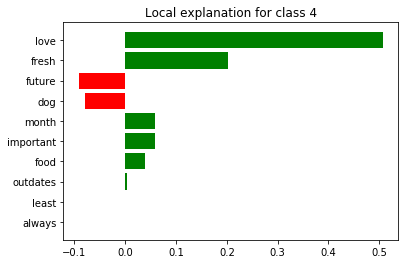

In [43]:
%matplotlib inline
fig = exp.as_pyplot_figure(label=4)

### Negative Review Example 

In [44]:
idx = 318461

print('Text :', xTest[idx])
print('True class: %s' % yTest[idx])
print('Probabilities =', svc_tfidf_pipeline.decision_function([xTest[idx]]))

Text : purchased contain dairy soy corn well addition dairy free soy free flavor free absolutely horrible dry tasting bar first word mouth taste like dirt thats im going waste money
True class: 1
Probabilities = [[ 0.81692204 -0.8502516  -1.05725093 -1.18338589 -0.76119399]]


In [45]:
exp = lime_explainer.explain_instance(xTest[idx], svc_tfidf_pipeline.decision_function, labels= (0,1,2,3,4), num_features=10)

exp.available_labels()

split() requires a non-empty pattern match.


[0, 1, 2, 3, 4]

In [46]:
exp.as_list(label=0)

[('horrible', 0.5403709779898352),
 ('free', -0.42736672387897123),
 ('waste', 0.38676695139309286),
 ('money', 0.27551135594933995),
 ('soy', -0.20985997434399775),
 ('mouth', 0.09623054802948397),
 ('word', 0.06349215976263482),
 ('contain', 0.04869579780382956),
 ('corn', 0.036705907164247896),
 ('going', 0.03369004510155407)]

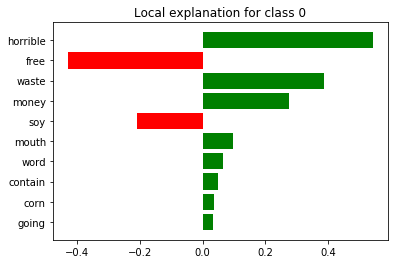

In [47]:
%matplotlib inline
fig = exp.as_pyplot_figure(label=0)

# Global Explanation

## SHAP

In [21]:
import shap
from alibi.explainers import KernelShap

# load JS visualization code to notebook
shap.initjs()

pred_fcn = svc_text_tfidf.decision_function
shap_explainer = KernelShap(pred_fcn)

In [22]:
shap_sample = shap.sample(xTrainTfidf,100)

In [23]:
shap_explainer.fit(shap_sample)

KernelShap(meta={
  'name': 'KernelShap',
  'type': ['blackbox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'link': 'identity',
              'group_names': None,
              'grouped': False,
              'groups': None,
              'weights': None,
              'summarise_background': False,
              'summarise_result': None,
              'transpose': False,
              'kwargs': {}}
            }
)

In [24]:
mean_scores_train = pred_fcn(shap_sample).mean(axis=0)
# are stored in the expected value attibute of the explainer ...
print(mean_scores_train - shap_explainer.expected_value)

[ 0.00000000e+00  1.11022302e-16 -2.22044605e-16 -2.22044605e-16
  2.77555756e-16]


In [25]:
svm_explanation = shap_explainer.explain(xTestTfidf[0:10], l1_reg=False)

  0%|          | 0/10 [00:00<?, ?it/s]

future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.


In [26]:
shapvalues = svm_explanation.shap_values

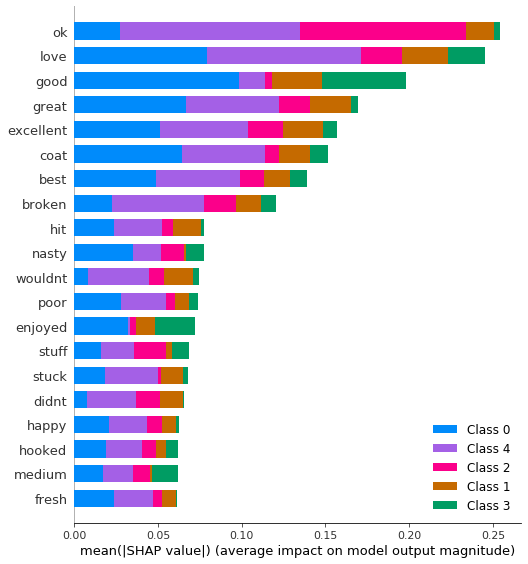

In [27]:
shap.summary_plot(shapvalues, xTestTfidf[0:10], feature_names=tfidf_vect.get_feature_names())

# Bag of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

xTrainBow = count_vect.fit_transform(xTrain)
xTestBow = count_vect.transform(xTest)

In [22]:
svc_text_bow = LinearSVC()

svc_text_bow.fit(xTrainBow,yTrain)

predictions = svc_text_tfidf.predict(xTestBow) 
results = confusion_matrix(yTest, predictions)
print ('Accuracy Score :',accuracy_score(yTest, predictions))
print ('Report : ')
print (classification_report(yTest,predictions))
print(results)

acc = accuracy_score(yTest, predictions) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(yTest, predictions, average='weighted') 
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, predictions, average='weighted') 
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, predictions, average='weighted') 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, predictions) 
print("The Matthews correlation coefficient is{}".format(MCC)) 


/home/vasanthan/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy Score : 0.6811963305826666
Report : 
              precision    recall  f1-score   support

           1       0.59      0.54      0.56     10929
           2       0.28      0.16      0.20      6082
           3       0.35      0.19      0.25      8926
           4       0.34      0.41      0.37     16957
           5       0.82      0.86      0.84     76471

    accuracy                           0.68    119365
   macro avg       0.48      0.43      0.45    119365
weighted avg       0.67      0.68      0.67    119365

[[ 5848   850   649  1264  2318]
 [ 1336   969   891  1536  1350]
 [  839   616  1740  3244  2487]
 [  457   303   708  6931  8558]
 [ 1353   723   916  7656 65823]]
The accuracy is 0.6811963305826666
The precision is 0.6665860747414877
The recall is 0.6811963305826666
The F1-Score is 0.6702987441398374
The Matthews correlation coefficient is0.4015754247594314


## LIME 

In [25]:
from lime.lime_text import LimeTextExplainer
lime_explainer = LimeTextExplainer()

from sklearn.pipeline import make_pipeline
svc_bow_pipeline = make_pipeline(count_vect, svc_text_bow)

In [26]:
idx = 166640

print('Text :', xTest[idx])
print('True class: %s' % yTest[idx])
print('Probabilities =', svc_bow_pipeline.decision_function([xTest[idx]]))

Text : dog love food important fresh outdates always least month future
True class: 5
Probabilities = [[-1.18225209 -0.9997969  -0.88584215 -0.73652841  0.61271353]]


In [27]:
exp = lime_explainer.explain_instance(xTest[idx], svc_bow_pipeline.decision_function, labels= (0,1,2,3,4), num_features=10)

exp.available_labels()

/home/vasanthan/anaconda3/lib/python3.6/site-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


[0, 1, 2, 3, 4]

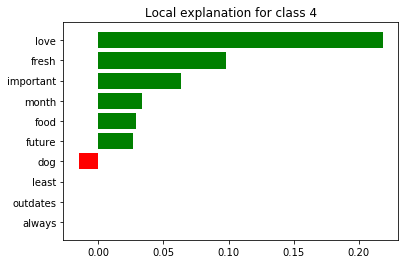

In [28]:
exp.as_list(label=4)

%matplotlib inline
fig = exp.as_pyplot_figure(label=4)

In [29]:
idx = 318461

print('Text :', xTest[idx])
print('True class: %s' % yTest[idx])
print('Probabilities =', svc_bow_pipeline.decision_function([xTest[idx]]))

Text : purchased contain dairy soy corn well addition dairy free soy free flavor free absolutely horrible dry tasting bar first word mouth taste like dirt thats im going waste money
True class: 1
Probabilities = [[ 0.98351487 -0.85392009 -1.04790719 -1.21209067 -0.70899593]]


In [30]:
exp = lime_explainer.explain_instance(xTest[idx], svc_bow_pipeline.decision_function, labels= (0,1,2,3,4), num_features=10)


exp.available_labels()

/home/vasanthan/anaconda3/lib/python3.6/site-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


[0, 1, 2, 3, 4]

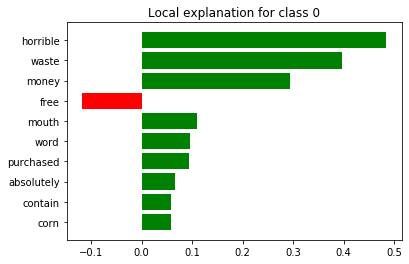

In [31]:
exp.as_list(label=0)

%matplotlib inline
fig = exp.as_pyplot_figure(label=0)

## SHAP

In [32]:
import shap
from alibi.explainers import KernelShap

# load JS visualization code to notebook
shap.initjs()

pred_fcn = svc_text_bow.decision_function

shap_explainer = KernelShap(pred_fcn)

In [33]:
shap_sample = shap.sample(xTrainBow,100)

shap_explainer.fit(shap_sample)

KernelShap(meta={
  'name': 'KernelShap',
  'type': ['blackbox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'link': 'identity',
              'group_names': None,
              'grouped': False,
              'groups': None,
              'weights': None,
              'summarise_background': False,
              'summarise_result': None,
              'transpose': False,
              'kwargs': {}}
            }
)

In [34]:
mean_scores_train = pred_fcn(shap_sample).mean(axis=0)
# are stored in the expected value attibute of the explainer ...
print(mean_scores_train - shap_explainer.expected_value)

[ 4.44089210e-16  0.00000000e+00  2.22044605e-16 -1.11022302e-16
  5.55111512e-17]


In [35]:
svm_explanation = shap_explainer.explain(xTestBow[0:10], l1_reg=False)

shapvalues = svm_explanation.shap_values

  0%|          | 0/10 [00:00<?, ?it/s]

future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.


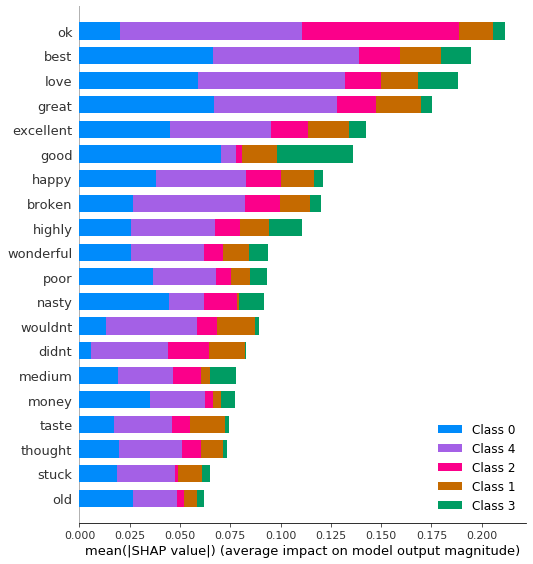

In [36]:
shap.summary_plot(shapvalues, xTestBow[0:10], feature_names=count_vect.get_feature_names())

# Only Summary

In [101]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(X['SummaryClean'], Y, test_size = 0.3, random_state = 42)

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

xTrainTfidf = tfidf_vect.fit_transform(xTrain)
xTestTfidf = tfidf_vect.transform(xTest)

In [104]:
svc_summary_tfidf = LinearSVC()

svc_summary_tfidf.fit(xTrainTfidf,yTrain)

LinearSVC()

In [105]:
predictions = svc_text_tfidf.predict(xTestTfidf) 
results = confusion_matrix(yTest, predictions)
print ('Accuracy Score :',accuracy_score(yTest, predictions))
print ('Report : ')
print (classification_report(yTest,predictions))
print(results)

acc = accuracy_score(yTest, predictions) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(yTest, predictions, average='weighted') 
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, predictions, average='weighted') 
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, predictions, average='weighted') 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, predictions) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

Accuracy Score : 0.6888283835295104
Report : 
              precision    recall  f1-score   support

           1       0.57      0.42      0.48     10929
           2       0.35      0.06      0.10      6082
           3       0.51      0.13      0.21      8926
           4       0.44      0.07      0.12     16957
           5       0.71      0.98      0.82     76471

    accuracy                           0.69    119365
   macro avg       0.52      0.33      0.35    119365
weighted avg       0.63      0.69      0.61    119365

[[ 4631   250   160   171  5717]
 [ 1288   337   390   182  3885]
 [  940   239  1186   588  5973]
 [  539    67   400  1142 14809]
 [  779    66   189   511 74926]]
The accuracy is 0.6888283835295104
The precision is 0.6262551217462641
The recall is 0.6888283835295104
The F1-Score is 0.6097453478243698
The Matthews correlation coefficient is0.32522684636418586


In [107]:
from lime.lime_text import LimeTextExplainer
lime_explainer = LimeTextExplainer()

from sklearn.pipeline import make_pipeline
svc_tfidf_pipeline = make_pipeline(tfidf_vect, svc_summary_tfidf)

In [108]:
idx = 166640

print('Text :', xTest[idx])
print('True class: %s' % yTest[idx])
print('Probabilities =', svc_tfidf_pipeline.decision_function([xTest[idx]]))

Text : great choice
True class: 5
Probabilities = [[-1.09969945 -0.99080917 -0.95814096 -0.69220252  0.55617102]]


In [109]:
exp = lime_explainer.explain_instance(xTest[idx], svc_tfidf_pipeline.decision_function, labels= (0,1,2,3,4), num_features=3)

exp.available_labels()

split() requires a non-empty pattern match.


[0, 1, 2, 3, 4]

In [110]:
exp.as_list(label=4)

[('great', 0.4518987524905337), ('choice', -0.2333120253494412)]

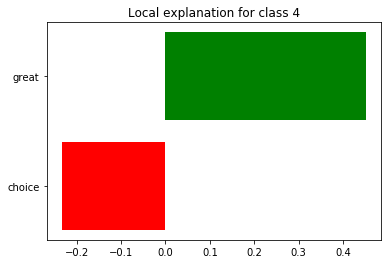

In [111]:
%matplotlib inline
fig = exp.as_pyplot_figure(label=4)

In [112]:
idx = 318461

print('Text :', xTest[idx])
print('True class: %s' % yTest[idx])
print('Probabilities =', svc_tfidf_pipeline.decision_function([xTest[idx]]))

Text : taste like dirt
True class: 1
Probabilities = [[-0.61939205 -0.7478566  -0.74549421 -0.553087   -0.26187987]]


In [113]:
exp = lime_explainer.explain_instance(xTest[idx], svc_tfidf_pipeline.decision_function, labels= (0,1,2,3,4), num_features=10)

exp.available_labels()

split() requires a non-empty pattern match.


[0, 1, 2, 3, 4]

In [114]:
exp.as_list(label=0)

[('taste', 0.10067507042163419),
 ('like', -0.08129919125095904),
 ('dirt', 0.003693686153960662)]

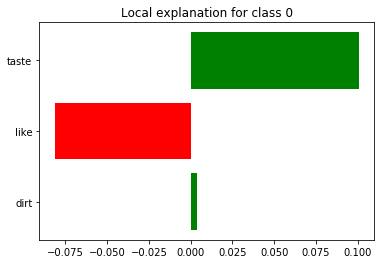

In [115]:
%matplotlib inline
fig = exp.as_pyplot_figure(label=0)

# LSTM - Summary

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

Using TensorFlow backend.
/home/vasanthan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vasanthan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vasanthan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vasanthan/anaconda3/lib/python3.6/site-pa

In [9]:
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(data['Summary'].values.astype(str))
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 30294 unique tokens.


In [10]:
X = tokenizer.texts_to_sequences(data['Summary'].values.astype(str))
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (397882, 250)


In [11]:
Y = pd.get_dummies(data['Score']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (397882, 5)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(358093, 250) (358093, 5)
(39789, 250) (39789, 5)


In [13]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(X_train, Y_train, epochs=3, batch_size=100, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 322283 samples, validate on 35810 samples
Epoch 1/3
322283/322283 [==============================] - 1492s 5ms/step - loss: 0.7876 - accuracy: 0.7137 - val_loss: 0.7358 - val_accuracy: 0.7292
Epoch 2/3
322283/322283 [==============================] - 1486s 5ms/step - loss: 0.6845 - accuracy: 0.7473 - val_loss: 0.7136 - val_accuracy: 0.7412
Epoch 3/3
322283/322283 [==============================] - 1459s 5ms/step - loss: 0.6397 - accuracy: 0.7635 - val_loss: 0.6976 - val_accuracy: 0.7457


In [16]:
model.save('keras_model.h5')

In [17]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

39789/39789 [==============================] - 54s 1ms/step
Test set
  Loss: 0.685
  Accuracy: 0.750


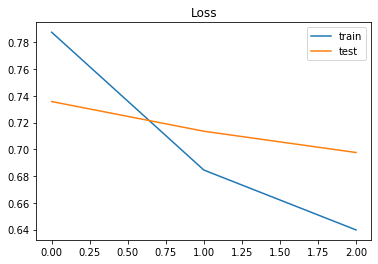

In [18]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [20]:
import shap

X_train_sample = shap.sample(X_train,100)
X_train_sample.shape

(100, 250)

In [21]:
deep_explainer = shap.DeepExplainer(model, X_train_sample)

In [23]:
X_test_sample = shap.sample(X_test,10)
X_test_sample.shape

(10, 250)

In [25]:
shap_values = deep_explainer.shap_values(X_test_sample)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.


In [32]:
word_index

{'great': 1,
 'the': 2,
 'good': 3,
 'a': 4,
 'for': 5,
 'and': 6,
 'not': 7,
 'best': 8,
 'my': 9,
 'love': 10,
 'it': 11,
 'but': 12,
 'coffee': 13,
 'this': 14,
 'tea': 15,
 'to': 16,
 'i': 17,
 'of': 18,
 'product': 19,
 'delicious': 20,
 'is': 21,
 'taste': 22,
 'very': 23,
 'in': 24,
 'flavor': 25,
 'like': 26,
 'food': 27,
 'excellent': 28,
 'dog': 29,
 'these': 30,
 'tasty': 31,
 'price': 32,
 'yummy': 33,
 'you': 34,
 'with': 35,
 'favorite': 36,
 'as': 37,
 'ever': 38,
 'too': 39,
 'so': 40,
 'stuff': 41,
 'loves': 42,
 'on': 43,
 'snack': 44,
 'are': 45,
 'better': 46,
 'dogs': 47,
 'just': 48,
 'healthy': 49,
 'free': 50,
 'no': 51,
 'awesome': 52,
 'them': 53,
 'than': 54,
 'tastes': 55,
 'chocolate': 56,
 'cat': 57,
 'what': 58,
 'nice': 59,
 'yum': 60,
 'one': 61,
 'at': 62,
 'perfect': 63,
 'quality': 64,
 'really': 65,
 'wonderful': 66,
 'sweet': 67,
 'treat': 68,
 'all': 69,
 'tasting': 70,
 'cup': 71,
 'bad': 72,
 'chips': 73,
 'buy': 74,
 'your': 75,
 'treats': 76,


In [61]:
word_index_new = dict([(value, key) for key, value in word_index.items()])
word_index_new

{1: 'great',
 2: 'the',
 3: 'good',
 4: 'a',
 5: 'for',
 6: 'and',
 7: 'not',
 8: 'best',
 9: 'my',
 10: 'love',
 11: 'it',
 12: 'but',
 13: 'coffee',
 14: 'this',
 15: 'tea',
 16: 'to',
 17: 'i',
 18: 'of',
 19: 'product',
 20: 'delicious',
 21: 'is',
 22: 'taste',
 23: 'very',
 24: 'in',
 25: 'flavor',
 26: 'like',
 27: 'food',
 28: 'excellent',
 29: 'dog',
 30: 'these',
 31: 'tasty',
 32: 'price',
 33: 'yummy',
 34: 'you',
 35: 'with',
 36: 'favorite',
 37: 'as',
 38: 'ever',
 39: 'too',
 40: 'so',
 41: 'stuff',
 42: 'loves',
 43: 'on',
 44: 'snack',
 45: 'are',
 46: 'better',
 47: 'dogs',
 48: 'just',
 49: 'healthy',
 50: 'free',
 51: 'no',
 52: 'awesome',
 53: 'them',
 54: 'than',
 55: 'tastes',
 56: 'chocolate',
 57: 'cat',
 58: 'what',
 59: 'nice',
 60: 'yum',
 61: 'one',
 62: 'at',
 63: 'perfect',
 64: 'quality',
 65: 'really',
 66: 'wonderful',
 67: 'sweet',
 68: 'treat',
 69: 'all',
 70: 'tasting',
 71: 'cup',
 72: 'bad',
 73: 'chips',
 74: 'buy',
 75: 'your',
 76: 'treats',


In [62]:
X_test_words = np.stack([np.array(list(map(lambda x: word_index_new.get(x), X_test[i]))) for i in range(10)])

In [63]:
X_test_words

array([[None, None, None, ..., None, 'mega', 'pack'],
       [None, None, None, ..., 'a', 'tea', 'strainer'],
       [None, None, None, ..., "didn't", 'like', 'it'],
       ...,
       [None, None, None, ..., "doesn't", 'mean', 'jack'],
       [None, None, None, ..., 'but', 'many', 'buds'],
       [None, None, None, ..., 'loves', 'this', 'food']], dtype=object)

In [70]:
shap.initjs()
shap.force_plot(deep_explainer.expected_value[0], shap_values[0][0], X_test_words[0])

In [78]:
shap.force_plot(deep_explainer.expected_value[0], shap_values[0][0], X_test_words[2])

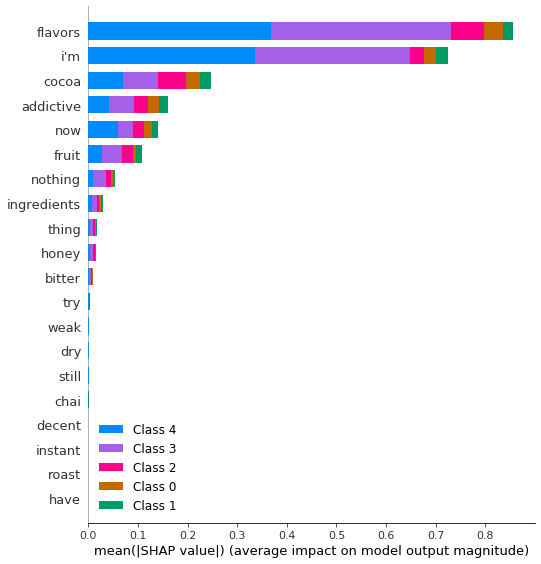

In [68]:
shap.summary_plot(shap_values, X_test_sample, word_index_new)

# Numerical Features

In [277]:
X

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,TextClean,SummaryClean
0,23756,B0013NUGDE,A2OH0EA9PEW4FN,bookgoddess88,2,3,1279411200,Only 2 points for Weight Watchers,I order these chips on a regular basis. I lik...,order chip regular basis like portioned one ba...,point weight watcher
1,528127,B000JMDH40,A8GHHQVULZ9NF,Alessandra,1,1,1240012800,Delicious!!!,Baby love it!Taste sweet but there is no sugar...,baby love ittaste sweet sugar baby love lookin...,delicious
2,491505,B0026LJRW8,A2S40W6PSX0CQI,Benjamin,1,1,1336348800,Baconlicious!,it's difficult to come up with 20 words for su...,difficult come word sunflower seed awesome wor...,baconlicious
3,98982,B001ED0H3C,A1XM4P40K1OPOM,"James M. Martin ""Mike""",0,0,1336694400,Will this probe work for the Oregon Scientific?,I beleive the probe I have for my Oregon Scien...,beleive probe oregon scientific burned anyone ...,probe work oregon scientific
4,435471,B000HDI5O8,AGCA8UHBJZ1JI,Nancy J. Jacobsen,1,1,1272067200,organic pumpkin,"ALthough the pumkin was good, almost 90% of th...",although pumkin good almost can dented badly w...,organic pumpkin
...,...,...,...,...,...,...,...,...,...,...,...
397912,249803,B000E5U37G,A30R1CQB41YKLB,"Charles Allard ""cdallard""",0,0,1232841600,If you don't have time to start from scratch...,"It's always better to start from scratch, and ...",always better start scratch always better well...,dont time start scratch
397913,102567,B0039BBWN6,A1UIXA657W8LWT,J. Williams,2,3,1312588800,does what it's supposed to do,"OK I can say I've used Infinit, Accelerade, Ga...",ok say ive used infinit accelerade gatorade ha...,supposed
397914,527792,B001EO7DTC,A17SW9EAXUD4C3,Frank Conforte,4,4,1286496000,Way Overpriced,First I bought this because it was suppose to ...,first bought suppose green chili actually red ...,way overpriced
397915,146845,B000LKTSO8,A3NU6TD1AW8P8F,Little Mother,6,26,1282176000,Choking Hazard and then some,"These teething biscuits are great, if you HOVE...",teething biscuit great hover child whole day t...,choking hazard


In [299]:
X_num = X[['HelpfulnessNumerator','HelpfulnessDenominator','Time']]
X_num

,HelpfulnessNumerator,HelpfulnessDenominator,Time
0,2,3,1279411200
1,1,1,1240012800
2,1,1,1336348800
3,0,0,1336694400
4,1,1,1272067200
...,...,...,...
397912,0,0,1232841600
397913,2,3,1312588800
397914,4,4,1286496000
397915,6,26,1282176000


In [300]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrainNum, xTestNum, yTrain, yTest = train_test_split(X_num, Y, test_size = 0.3, random_state = 42)

In [302]:
svc_num = LinearSVC()

svc_num.fit(xTrainNum,yTrain)
predictions = svc_num.predict(xTestNum) 
results = confusion_matrix(yTest, predictions)
print ('Accuracy Score :',accuracy_score(yTest, predictions))
print ('Report : ')
print (classification_report(yTest,predictions))
print(results)

Liblinear failed to converge, increase the number of iterations.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Accuracy Score : 0.6406484312822016
Report : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10929
           2       0.00      0.00      0.00      6082
           3       0.00      0.00      0.00      8926
           4       0.00      0.00      0.00     16957
           5       0.64      1.00      0.78     76471

    accuracy                           0.64    119365
   macro avg       0.13      0.20      0.16    119365
weighted avg       0.41      0.64      0.50    119365

[[    0     0     0     0 10929]
 [    0     0     0     0  6082]
 [    0     0     0     0  8926]
 [    0     0     0     0 16957]
 [    0     0     0     0 76471]]


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [306]:
xTestNum

,HelpfulnessNumerator,HelpfulnessDenominator,Time
812,0,0,1308528000
314218,1,2,1337817600
364813,1,2,1294531200
83045,1,1,1344124800
192658,2,2,1336780800
...,...,...,...
166640,2,2,1257379200
15667,0,2,1310083200
318461,1,1,1338768000
193213,0,0,1335571200


In [308]:
yTest

812       4
314218    2
364813    2
83045     5
192658    1
         ..
166640    5
15667     4
318461    1
193213    5
301282    3
Name: Score, Length: 119365, dtype: int64

In [314]:
idx = 83045

print('Sample :', xTestNum.loc[idx])
print('True class: %s' % yTest.loc[idx])
print('Probabilities =', svc_num.decision_function([xTestNum.loc[idx]]))

Sample : HelpfulnessNumerator               1
HelpfulnessDenominator             1
Time                      1344124800
Name: 83045, dtype: int64
True class: 5
Probabilities = [[-1.07727997 -1.06263661 -1.02537569  1.00562379  1.00777353]]


In [315]:
import lime.lime_tabular

X_featurenames = ['HelpfulnessNumerator','HelpfulnessDenominator','Time']
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(xTrainNum), feature_names=X_featurenames, verbose=True, mode='regression')

In [317]:
exp = explainer.explain_instance(xTestNum.loc[idx], svc_num.decision_function, labels= (0,1,2,3,4), num_features=3)

Intercept -1.0244196650620974
Prediction_local [-1.07659653]
Right: -1.0772799667690576


In [318]:
exp.as_list(label=4)

[('Time > 1332806400.00', -0.050928042895266375),
 ('0.00 < HelpfulnessNumerator <= 2.00', -0.001192842344257251),
 ('0.00 < HelpfulnessDenominator <= 1.00', -5.5976455794914135e-05)]

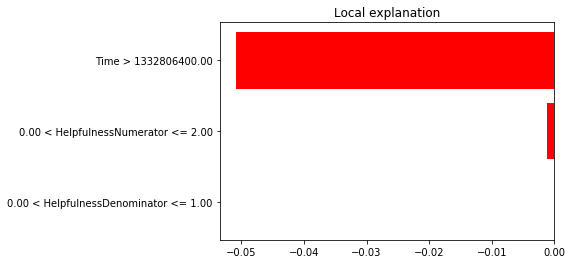

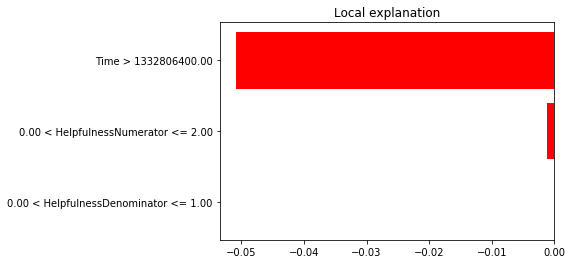

In [319]:
exp.as_pyplot_figure()

In [341]:
def faithfulness(model, x, coefs, base):
    #find predicted class
    pred_class = np.argmax(model.decision_function([x]), axis=1)[0]

    #find indexs of coefficients in decreasing order of value
    ar = np.argsort(-coefs)  #argsort returns indexes of values sorted in increasing order; so do it for negated array
    pred_probs = np.zeros(x.shape[0])
    for ind in np.nditer(ar):
        x_copy = x.copy()
        x_copy[ind] = base[ind]
        x_copy_pr = model.decision_function([x_copy])
        pred_probs[ind] = x_copy_pr[0][pred_class]

    return -np.corrcoef(coefs, pred_probs)[0,1]


def monotonicity(model, x, coefs, base):
    #find predicted class
    pred_class = np.argmax(model.decision_function([x]), axis=1)[0]

    x_copy = base.copy()

    #find indexs of coefficients in increasing order of value
    ar = np.argsort(coefs)
    pred_probs = np.zeros(x.shape[0])
    for ind in np.nditer(ar):
        x_copy[ind] = x[ind]
        x_copy_pr = model.decision_function([x_copy])
        pred_probs[ind] = x_copy_pr[0][pred_class]

    return np.all(np.diff(pred_probs[ar]) >= 0)

In [342]:
le = exp.local_exp[1]

m = exp.as_map()

x = xTestNum.loc[idx]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]


base = np.zeros(x.shape[0])
print (coefs)
print (base)


print("Faithfulness: ", faithfulness(svc_num, x, coefs, base))
print("Monotonity: ", monotonicity(svc_num, x, coefs, base))

[-1.19284234e-03 -5.59764558e-05 -5.09280429e-02]
[0. 0. 0.]
Faithfulness:  -0.9998085187418939
Monotonity:  False


# Text and Summary - Couldn't complete XAI

In [85]:
features = X[['TextClean','SummaryClean']].copy()
features

,TextClean,SummaryClean
0,order chip regular basis like portioned one ba...,point weight watcher
1,baby love ittaste sweet sugar baby love lookin...,delicious
2,difficult come word sunflower seed awesome wor...,baconlicious
3,beleive probe oregon scientific burned anyone ...,probe work oregon scientific
4,although pumkin good almost can dented badly w...,organic pumpkin
...,...,...
397912,always better start scratch always better well...,dont time start scratch
397913,ok say ive used infinit accelerade gatorade ha...,supposed
397914,first bought suppose green chili actually red ...,way overpriced
397915,teething biscuit great hover child whole day t...,choking hazard


In [86]:
target = Y
target

0         3
1         5
2         5
3         5
4         3
         ..
397912    5
397913    5
397914    1
397915    1
397916    4
Name: Score, Length: 397882, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

preprocess = ColumnTransformer(
    [
     ('text_tfidf', TfidfVectorizer(max_features = 1000, stop_words = 'english'), 'TextClean'),
     ('summary_tfidf', TfidfVectorizer(max_features = 1000, stop_words = 'english'), 'SummaryClean')
    ],
    remainder='passthrough')

In [91]:
preprocess.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('text_tfidf',
                                 TfidfVectorizer(max_features=1000,
                                                 stop_words='english'),
                                 'TextClean'),
                                ('summary_tfidf',
                                 TfidfVectorizer(max_features=1000,
                                                 stop_words='english'),
                                 'SummaryClean')])

In [92]:
X_train_proc = preprocess.transform(X_train)
X_test_proc = preprocess.transform(X_test)

In [93]:
X_train_proc.shape
X_test_proc.shape

(79577, 2000)

In [95]:
from sklearn.svm import LinearSVC

svc_text = LinearSVC()
svc_text.fit(X_train_proc, y_train)

LinearSVC()

In [97]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 

predictions = svc_text.predict(X_test_proc) 
results = confusion_matrix(y_test, predictions)
print ('Accuracy Score :',accuracy_score(y_test, predictions))
print ('Report : ')
print (classification_report(y_test,predictions))
print(results)

acc = accuracy_score(y_test, predictions) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(y_test, predictions, average='weighted') 
print("The precision is {}".format(prec)) 

rec = recall_score(y_test, predictions, average='weighted') 
print("The recall is {}".format(rec)) 

f1 = f1_score(y_test, predictions, average='weighted') 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(y_test, predictions) 
print("The Matthews correlation coefficient is {}".format(MCC)) 


Accuracy Score : 0.7327996782990059
Report : 
              precision    recall  f1-score   support

           1       0.63      0.67      0.65      7522
           2       0.46      0.12      0.19      4000
           3       0.52      0.21      0.30      5990
           4       0.49      0.20      0.29     11195
           5       0.78      0.97      0.86     50870

    accuracy                           0.73     79577
   macro avg       0.58      0.43      0.46     79577
weighted avg       0.69      0.73      0.68     79577

[[ 5021   229   202   205  1865]
 [ 1317   485   409   292  1497]
 [  797   235  1251   990  2717]
 [  315    60   376  2277  8167]
 [  473    43   163   911 49280]]
The accuracy is 0.7327996782990059
The precision is 0.6867155106326016
The recall is 0.7327996782990059
The F1-Score is 0.6846853004802735
The Matthews correlation coefficient is 0.4594023688729616
